``CASTRO Y TIPAN``

In [483]:
# Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import re

In [484]:
df = pd.read_csv('Carrito.csv')
df.head()

# Ver todas las unidades únicas
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [485]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None


In [486]:

print(df.describe(include="all"))

                          name         year  selling_price     km_driven  \
count                     8128  8128.000000   8.128000e+03  8.128000e+03   
unique                    2058          NaN            NaN           NaN   
top     Maruti Swift Dzire VDI          NaN            NaN           NaN   
freq                       129          NaN            NaN           NaN   
mean                       NaN  2013.804011   6.382718e+05  6.981951e+04   
std                        NaN     4.044249   8.062534e+05  5.655055e+04   
min                        NaN  1983.000000   2.999900e+04  1.000000e+00   
25%                        NaN  2011.000000   2.549990e+05  3.500000e+04   
50%                        NaN  2015.000000   4.500000e+05  6.000000e+04   
75%                        NaN  2017.000000   6.750000e+05  9.800000e+04   
max                        NaN  2020.000000   1.000000e+07  2.360457e+06   

          fuel seller_type transmission        owner    mileage   engine  \
count     8

In [487]:
# Extraer valor numérico
df['mileage_value'] = df['mileage'].str.extract(r'([\d\.]+)').astype(float)

# Extraer unidad
df['mileage_unit'] = df['mileage'].str.extract(r'([a-zA-Z/]+)$')

# Convertir km/kg a kmpl
factor_cng = 1.33
df.loc[df['mileage_unit'] == 'km/kg', 'mileage_value'] *= factor_cng
media_mileage = df['mileage_value'].mean()

df['mileage_value'].fillna(df['mileage_value'].mean(), inplace=True)

print(df.isna().sum())
df.head(20)

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
mileage_value      0
mileage_unit     221
dtype: int64


C:\Users\Dev\AppData\Local\Temp\ipykernel_4248\991156.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage_value'].fillna(df['mileage_value'].mean(), inplace=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_value,mileage_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.400000,kmpl
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.140000,kmpl
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.700000,kmpl
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.000000,kmpl
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.100000,kmpl
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,20.140000,kmpl
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,23.009000,km/kg
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,16.100000,kmpl
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,23.590000,kmpl
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,20.000000,kmpl


In [488]:
df["engine"] = pd.to_numeric(
    df["engine"].astype(str).str.extract(r"(\d+\.?\d*)")[0],
    errors="coerce"
)

df["max_power"] = pd.to_numeric(
    df["max_power"].astype(str).str.extract(r"(\d+\.?\d*)")[0],
    errors="coerce"
)
def procesar_torque(torque_raw):
    if pd.isna(torque_raw):
        return pd.Series([np.nan, np.nan])
    
    torque_str = str(torque_raw).replace(',', '').lower() 
    
    valor_match = re.search(r'([\d\.]+)', torque_str)
    valor = float(valor_match.group(1)) if valor_match else np.nan
    
    unidad_match = re.search(r'(nm|kgm)', torque_str)
    unidad = unidad_match.group(1) if unidad_match else 'nm'
    
    if unidad == 'kgm':
        valor *= 9.80665
    
    rpm_match = re.search(r'(\d{3,5}(?:-\d{3,5})?)\s*rpm', torque_str)
    if not rpm_match:
        rpm_match = re.search(r'([\d]{3,5}(?:-[\d]{3,5})?).*rpm', torque_str)
    
    if rpm_match:
        rpm_raw = rpm_match.group(1)
        if '-' in rpm_raw:
            a, b = rpm_raw.split('-')
            rpm = (float(a) + float(b)) / 2
        else:
            rpm = float(rpm_raw)
    else:
        rpm = np.nan
    
    return pd.Series([valor, rpm])

# Aplicar la función y crear nuevas columnas
df[['torque_value', 'torque_rpm']] = df['torque'].apply(procesar_torque)

# Codificación ordinal para 'owner'
df['owner'] = df['owner'].map({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 0
})
# Codificación ordinal para 'fuel'
orden_fuel = ['Diesel', 'Petrol', 'LPG', 'CNG']
df['fuel_ordinal'] = df['fuel'].map({cat: idx+1 for idx, cat in enumerate(orden_fuel)})

# Codificación ordinal para 'transmission'
df['transmission'].replace({'Manual': 1, 'Automatic': 2}, inplace=True)

# Codificación one-hot para 'seller_type'

orden_seller_type = {'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3}

# Aplicar la codificación ordinal
df['seller_type'] = df['seller_type'].map(orden_seller_type)

df.head()


C:\Users\Dev\AppData\Local\Temp\ipykernel_4248\2752516759.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transmission'].replace({'Manual': 1, 'Automatic': 2}, inplace=True)
C:\Users\Dev\AppData\Local\Temp\ipykernel_4248\2752516759.py:57: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['tr

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_value,mileage_unit,torque_value,torque_rpm,fuel_ordinal
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,1,1,1,23.4 kmpl,1248.0,74.00,190Nm@ 2000rpm,5.0,23.40,kmpl,190.000000,2000.0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,1,1,2,21.14 kmpl,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,21.14,kmpl,250.000000,2000.0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,1,1,3,17.7 kmpl,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,kmpl,124.544455,2700.0,2
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,1,1,1,23.0 kmpl,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,23.00,kmpl,219.668960,2250.0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,1,1,1,16.1 kmpl,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,kmpl,112.776475,4500.0,2


In [489]:
print(df.isnull().sum())
print(df.isna().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
mileage_value      0
mileage_unit     221
torque_value     222
torque_rpm       273
fuel_ordinal       0
dtype: int64
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
mileage_value      0
mileage_unit     221
torque_value     222
torque_rpm       273
fuel_ordinal       0
dtype: int64


In [490]:
df['torque_value'].fillna(df['torque_value'].median(), inplace=True)
df['torque_rpm'].fillna(df['torque_rpm'].median(), inplace=True)
df['engine'].fillna(df["engine"].median(), inplace=True)
df['max_power'].fillna(df['max_power'].median(), inplace=True)
df['seats'].fillna(df['seats'].median(), inplace=True)

print(df.isna().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine             0
max_power          0
torque           222
seats              0
mileage_value      0
mileage_unit     221
torque_value       0
torque_rpm         0
fuel_ordinal       0
dtype: int64


C:\Users\Dev\AppData\Local\Temp\ipykernel_4248\3368854559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['torque_value'].fillna(df['torque_value'].median(), inplace=True)
C:\Users\Dev\AppData\Local\Temp\ipykernel_4248\3368854559.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [491]:
# Eliminar columnas innecesarias
df.drop(columns=['name','torque', 'mileage', 'mileage_unit', 'fuel'], inplace=True)

#renombrar la columna st_trustmark dealer a st_Trustmarl_Dealer
df.rename(columns={'st_Trustmark Dealer': 'st_Trustmark_Dealer'}, inplace=True)


df.head()

,year,selling_price,km_driven,seller_type,transmission,owner,engine,max_power,seats,mileage_value,torque_value,torque_rpm,fuel_ordinal
0,2014,450000,145500,1,1,1,1248.0,74.00,5.0,23.40,190.000000,2000.0,1
1,2014,370000,120000,1,1,2,1498.0,103.52,5.0,21.14,250.000000,2000.0,1
2,2006,158000,140000,1,1,3,1497.0,78.00,5.0,17.70,124.544455,2700.0,2
3,2010,225000,127000,1,1,1,1396.0,90.00,5.0,23.00,219.668960,2250.0,1
4,2007,130000,120000,1,1,1,1298.0,88.20,5.0,16.10,112.776475,4500.0,2


In [492]:
df.isna().sum()

year             0
selling_price    0
km_driven        0
seller_type      0
transmission     0
owner            0
engine           0
max_power        0
seats            0
mileage_value    0
torque_value     0
torque_rpm       0
fuel_ordinal     0
dtype: int64

In [493]:
# Seprar variables dependientes e independientes
x = df.drop('selling_price', axis=1)
y = df['selling_price']


<Axes: >

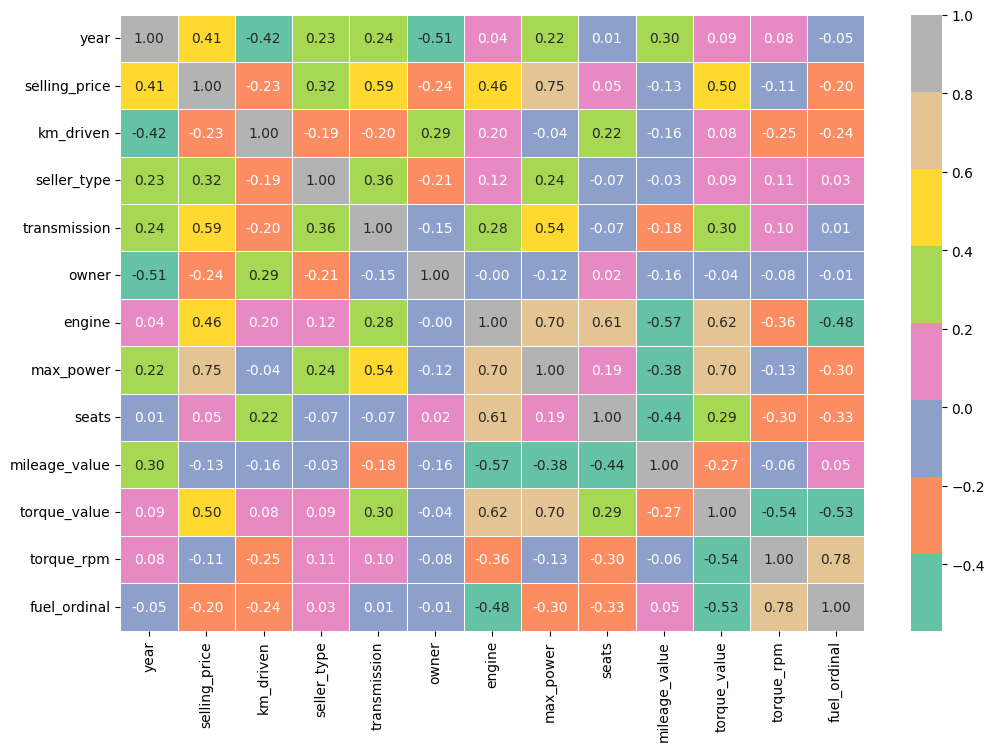

In [494]:
# ampliamos el grafico
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='Set2')


In [497]:
# Aplicamos el modelo 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

regresion = LinearRegression()
regresion.fit(x_train, y_train)
y_pred = regresion.predict(x_test)
print(regresion.intercept_)
print(regresion.coef_)
print(f"R2 = {regresion.score(x_train, y_train):.2%}")



-74921304.47529322
[ 3.69031328e+04 -1.00650505e+00  1.07823202e+05  4.80661492e+05
 -3.22051038e+04  5.09691287e+00  1.43857747e+04 -5.01743349e+04
  2.79455410e+03 -4.84481505e+02 -1.80078832e+02  1.27961537e+05]
R2 = 68.18%


$$ selling_price = -75212305.52391961 3.71 * year + 4.69 *  km_driven - 2.5 * trasmmition +3.45 * owner + 1.38 * engine -4.94 * max_power + 3.20 * seats - 4.67 * mileage_value - 1.64 * torque_value + 1.29 * torque_rpm + 1.80 * fuel_ordinal - 6.71 * st_Dealer - 1.13 * st_Individual
 

In [499]:
# OLS
import statsmodels.formula.api as smf
data = pd.DataFrame(x_train, columns=x_train.columns)
data["selling_price"] = y_train.values
indep_vars = " + ".join(data.columns.drop("selling_price"))
formula = f"selling_price ~ {indep_vars}"
regre = smf.ols(formula=formula, data=df).fit()
print(regre.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1456.
Date:                Thu, 02 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:32:58   Log-Likelihood:            -1.1741e+05
No. Observations:                8128   AIC:                         2.348e+05
Df Residuals:                    8115   BIC:                         2.349e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.449e+07   3.56e+06    -20.951

$$ y = -7.449 + 1.45 * x $$

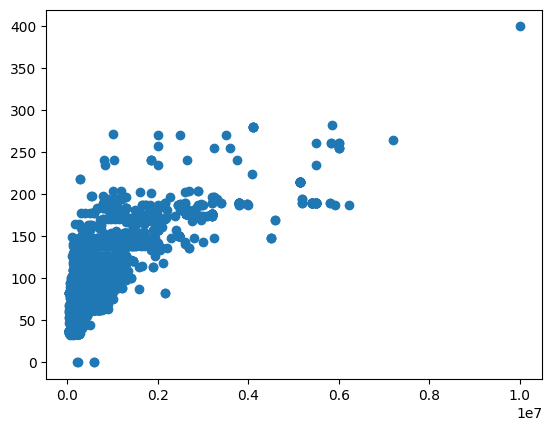

In [ ]:
plt.scatter(data["selling_price"], data["max_power"])


<Axes: xlabel='selling_price', ylabel='max_power'>

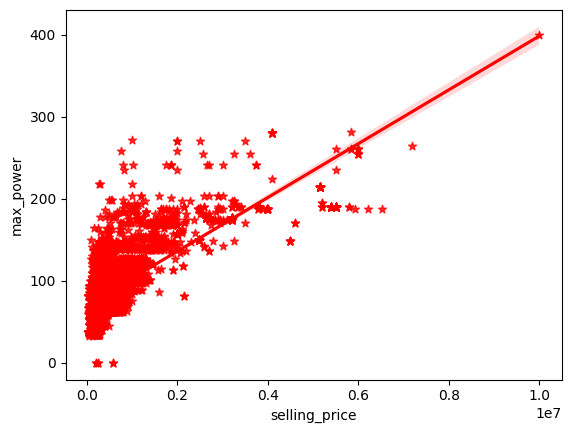

In [502]:
sns.regplot(x="selling_price", y="max_power", data=df, marker="*", color="red")

Error cuadrático medio: 453657.6011209971


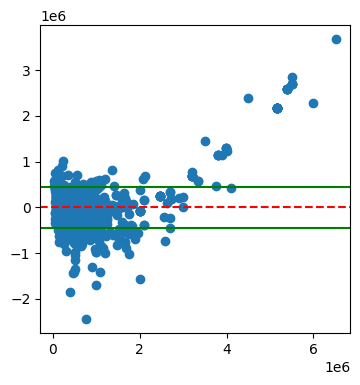

In [503]:
from sklearn.metrics import root_mean_squared_error

y_pred = regresion.predict(x_test)
residuos = y_test - y_pred
fig = plt.figure(figsize=(4,4))
mse = root_mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)
plt.scatter(y_test, residuos)
plt.axhline(mse, color='g', linestyle='-')
plt.axhline(-mse, color='g', linestyle='-')
plt.axhline(y=0, color='r', linestyle='--')

`` Se selecciono el modelo OLS 0.683``